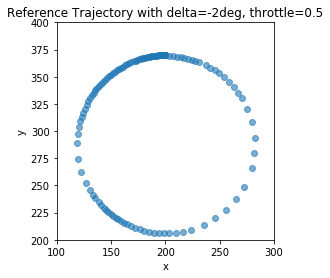

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin, cos, pi
import numpy as np


# Read the reference trajectory information from simulation output

with open("../build/output/x_vals.txt") as f:
    x_string = f.readlines()[1].split(" ")[:-1]

with open("../build/output/y_vals.txt") as f:
    y_string = f.readlines()[1].split(" ")[:-1]

with open("../build/output/psi_vals.txt") as f:
    psi_string = f.readlines()[1].split(" ")[:-1]

with open("../build/output/v_vals.txt") as f:
    v_string = f.readlines()[1].split(" ")[:-1]

x_data = [float(x) for x in x_string]
y_data = [float(x) for x in y_string]
psi_data = [float(x) for x in psi_string]
v_data = [float(x)*0.44704 for x in v_string]

fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Reference Trajectory with delta=-2deg, throttle=0.5')
plt.scatter(x_data[:-16], y_data[:-16], alpha=0.6)

plt.xlim(100,300)
plt.ylim(200,400)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
import scipy.linalg as linalg

# Fit the reference trajectory to ellipses

def  ellipses(x, a, b, c, d, e, f):
    return a*x[0] + b*x[1] + c*x[2] + d*x[3] + e*x[4] + f*X[5]

X_1 = np.multiply(x_data, x_data)
X_2 = np.multiply(x_data, y_data)
X_3 = np.multiply(y_data, y_data)
X_4 = np.array(x_data)
X_5 = np.array(y_data)
X_6 = np.ones((X_1.shape[0],))


X = np.array([X_1, X_2, X_3, X_4, X_5, X_6])
S = np.dot(X, X.transpose())
H = np.zeros((6,6))
H[0][2] = 2
H[2][0] = 2
H[1][1] = -1

L, V = linalg.eig(S, H)
W = V[:,0]
res = ellipses(X, W[0], W[1], W[2], W[3], W[4], W[5])
print(L)
print(W)

# print(np.dot(np.dot(V[0].transpose(), H), V[0]))
# print(L)
# print(V)
# print(res)

[ 7.35222545e+04+0.j -5.64540303e+08+0.j -4.95868564e+08+0.j
             inf+0.j             inf+0.j             inf+0.j]
[ 8.61590564e-06  2.71238034e-08  8.56377479e-06 -3.46526623e-03
 -4.93334541e-03  9.99981827e-01]


In [7]:
def solve_ellipse(A,B,C,D,E,F):
            
    Xc = (B*E-2*C*D)/(4*A*C-B**2)
    Yc = (B*D-2*A*E)/(4*A*C-B**2)
        
    FA1 = 2*(A*Xc**2+C*Yc**2+B*Xc*Yc-F)
    FA2 = np.sqrt((A-C)**2+B**2)
    
    MA = np.sqrt(FA1/(A+C+FA2)) #长轴
    SMA= np.sqrt(FA1/(A+C-FA2)) if A+C-FA2!=0 else 0#半长轴
    
    if B==0 and F*A<F*C:
        Theta = 0
    elif B==0 and F*A>=F*C:
        Theta = 90
    elif B!=0 and F*A<F*C:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 0.5*(-90-alpha) if alpha<0 else 0.5*(90-alpha)
    else:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 90+0.5*(-90-alpha) if alpha<0 else 90+0.5*(90-alpha)
            
    if MA<SMA:
        MA,SMA = SMA,MA
            
    return [Xc,Yc,MA,SMA,Theta]

[200.64415569442065, 287.7179335922038, 81.8619390085644, 81.58239842037125, 103.74403295418854]


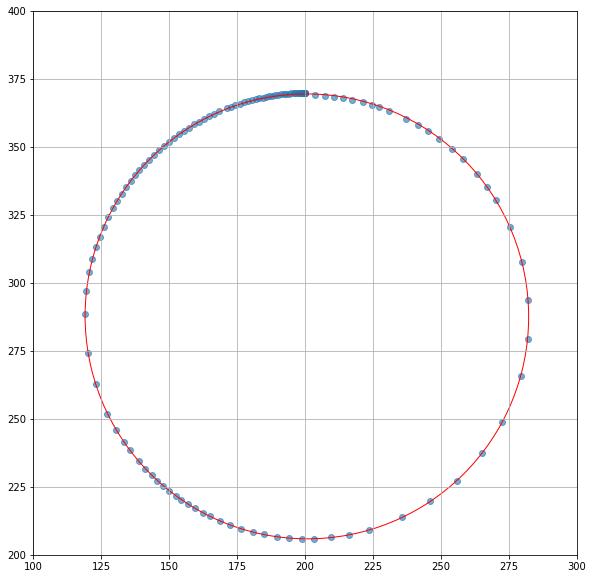

In [8]:
ellipse_par = solve_ellipse(W[0], W[1], W[2], W[3], W[4], W[5])
print(ellipse_par)

from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect = 'equal')

e = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

e.set_facecolor("none")
e.set_edgecolor('red')

ax.add_artist(e)
ax.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.scatter(x_data[:-16], y_data[:-16], alpha=0.6)
plt.show()

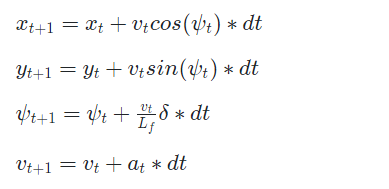

Lf:2.73997


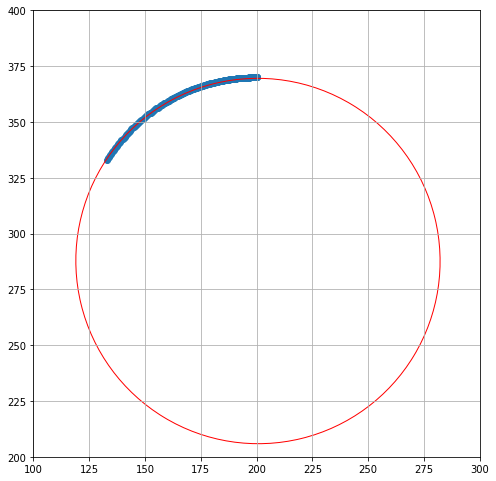

In [9]:
# output_values = open("../build/value_output.txt")
# s_values = output_values.readlines()
# output_values.close()
with open("../build/value_output.txt") as f:
    s_values = f.readlines()

s_x = s_values[1].split(" ")[:-1]
s_y = s_values[3].split(" ")[:-1]
print(s_values[8])
x_out_data = [float(x) for x in s_x]
y_out_data = [float(x) for x in s_y]
ell = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

ell.set_facecolor("none")
ell.set_edgecolor('red')
fig = plt.figure(figsize=(8,10))
axis = fig.gca()
plt.scatter(x_out_data, y_out_data)
axis.add_artist(ell)

axis.set_aspect('equal')
axis.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.show()

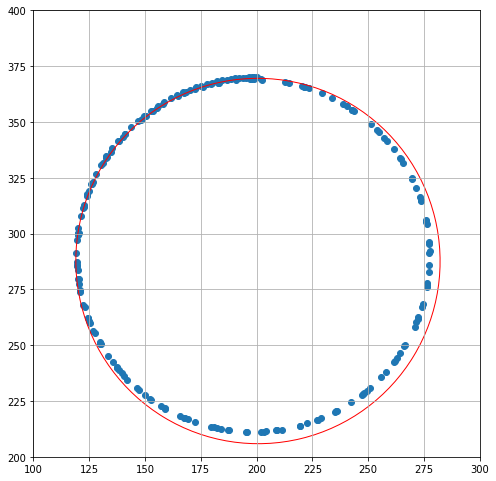

In [28]:
N=200
dt=0.5
delta=2/180*pi
a=0.5
Lf0=2.73997

x_0 = np.zeros(N)
y_0 = np.zeros(N)
psi_0 = np.zeros(N)
v_0 = np.zeros(N)

x_0[0] = x_data[0]
y_0[0] = y_data[0]
psi_0[0] = psi_data[0]
v_0[0] = v_data[0]

for i in range(1,N):
    x_0[i] = x_0[i-1] + v_0[i-1] * dt * cos(psi_0[i-1])
    y_0[i] = y_0[i-1] + v_0[i-1] * dt * sin(psi_0[i-1])
    psi_0[i] = psi_0[i-1] + v_0[i-1] * delta * dt / Lf0
    v_0[i] = v_0[i-1] + a * dt

e = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

e.set_facecolor("none")
e.set_edgecolor('red')
fig = plt.figure(figsize=(8,10))
ax = fig.gca()
plt.scatter(x_0, y_0)
ax.add_artist(e)

ax.set_aspect('equal')
ax.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.show()